In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [63]:
Lake_Bilancino = pd.read_csv('./datasets/Lake_Bilancino.csv')

In [64]:
Lake_Bilancino

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31
...,...,...,...,...,...,...,...,...,...
6598,26/06/2020,0.0,0.0,0.0,0.0,0.0,22.50,250.85,0.60
6599,27/06/2020,0.0,0.0,0.0,0.0,0.0,23.40,250.84,0.60
6600,28/06/2020,0.0,0.0,0.0,0.0,0.0,21.50,250.83,0.60
6601,29/06/2020,0.0,0.0,0.0,0.0,0.0,23.20,250.82,0.60


In [65]:
Lake_Bilancino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


In [66]:
Lake_Bilancino.shape

(6603, 9)

### Filled Entries

<AxesSubplot:>

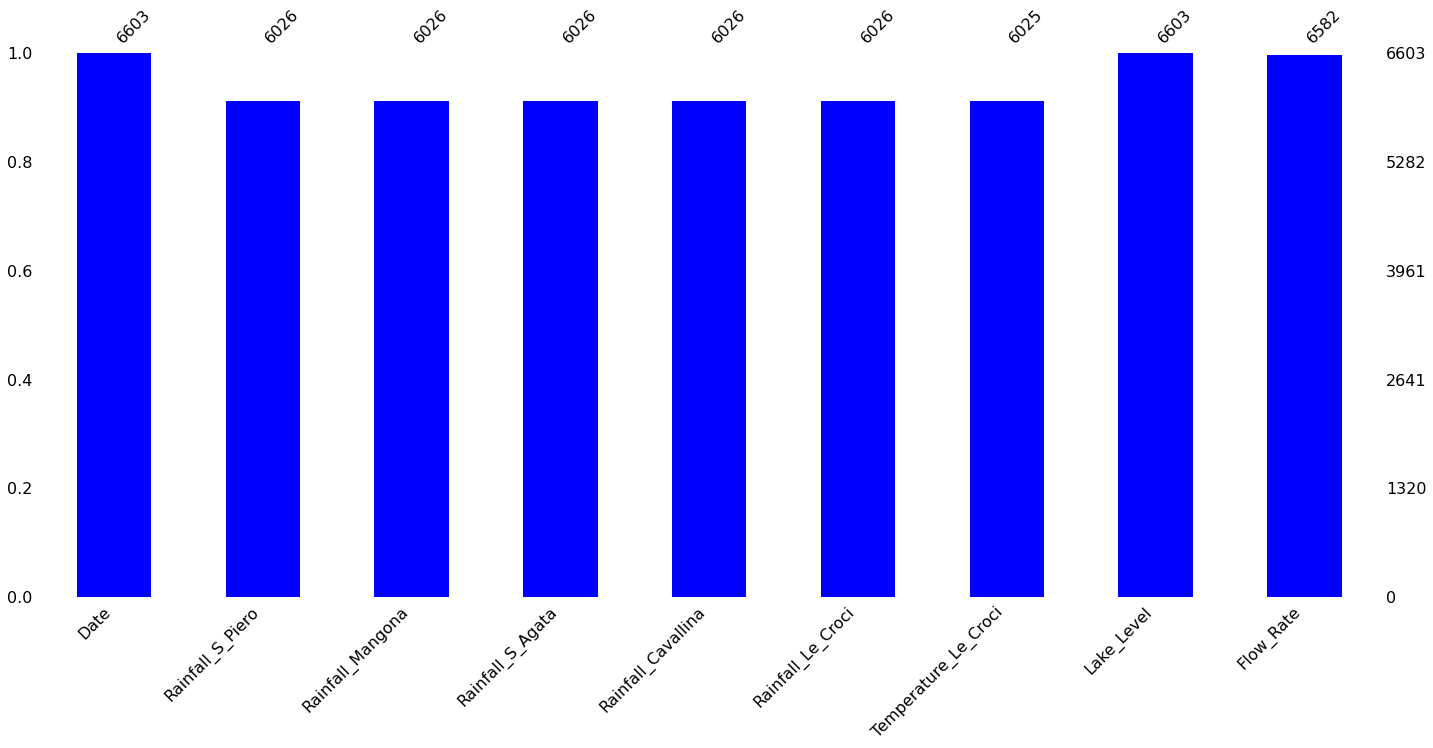

In [67]:
msno.bar(Lake_Bilancino,color='b')

### Dates starting and ending values

In [68]:
print('starting date:', Lake_Bilancino.Date.values[[0,-1]][0])
print('ending date:', Lake_Bilancino.Date.values[[0,-1]][1])


starting date: 03/06/2002
ending date: 30/06/2020


### Position of Null values

<AxesSubplot:>

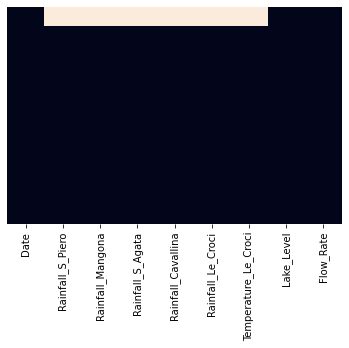

In [69]:
sns.heatmap(Lake_Bilancino.isnull(),yticklabels=False,cbar=False)

In [70]:
data=Lake_Bilancino.copy()
data.drop('Date',axis=1,inplace=True)

### Feature Selection

<AxesSubplot:>

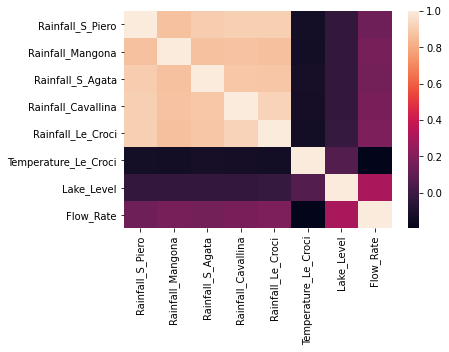

In [71]:
sns.heatmap(data.corr())

In [72]:
file = Lake_Bilancino
features_nan=[features for features in file.columns if file[features].isnull().sum()>1 and file[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(file[feature].isnull().mean()*100,4),'% missing ')

Rainfall_S_Piero 8.7385 % missing 
Rainfall_Mangona 8.7385 % missing 
Rainfall_S_Agata 8.7385 % missing 
Rainfall_Cavallina 8.7385 % missing 
Rainfall_Le_Croci 8.7385 % missing 
Temperature_Le_Croci 8.7536 % missing 
Flow_Rate 0.318 % missing 


In [73]:
'''
Columns that are going to be dropped

''

'''

"\nColumns that are going to be dropped\n\n''\n\n"

In [74]:
#Lake_Bilancino_corr = Lake_Bilancino.drop(['Temperature_Le_Croci'],axis=1)

<AxesSubplot:>

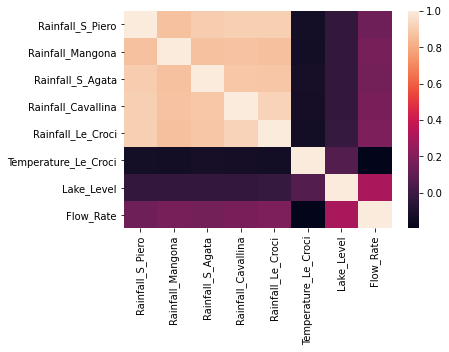

In [75]:
sns.heatmap(Lake_Bilancino.corr())

In [76]:
a = Lake_Bilancino

features_nan=[features for features in a.columns if a[features].isnull().sum()>1 and a[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(a[feature].isnull().mean()*100,4),'% missing ')

Rainfall_S_Piero 8.7385 % missing 
Rainfall_Mangona 8.7385 % missing 
Rainfall_S_Agata 8.7385 % missing 
Rainfall_Cavallina 8.7385 % missing 
Rainfall_Le_Croci 8.7385 % missing 
Temperature_Le_Croci 8.7536 % missing 
Flow_Rate 0.318 % missing 


In [77]:
Lake_Bilancino = Lake_Bilancino.drop(['Date'],axis=1)

### Imputation

In [78]:
def cal(x):
    null_values=x.isnull().sum()
    count_values=x.value_counts().unique
    mean=x.mean()
    median=x.median()
    mode=x.mode()
    print('null_values: ',null_values,'count_values: ', count_values, 'mean: ',mean,'median: ', median,'mode: ',mode, sep=' \n  ' )
    return

Rainfall_S_Piero

In [79]:
x=a['Rainfall_S_Piero']
cal(x)

null_values:  
  577 
  count_values:  
  <bound method Series.unique of 0.0     3679
0.2      545
0.4      148
0.6       81
0.8       72
        ... 
53.2       1
26.2       1
52.4       1
34.6       1
59.2       1
Name: Rainfall_S_Piero, Length: 206, dtype: int64> 
  mean:  
  2.4712246929970267 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


In [80]:
a['Rainfall_S_Piero']=a['Rainfall_S_Piero'].fillna(a['Rainfall_S_Piero'].median())

Rainfall_Mangona

In [81]:
x=a['Rainfall_Mangona']
cal(x)

null_values:  
  577 
  count_values:  
  <bound method Series.unique of 0.0      3822
0.2       291
0.4       107
0.8        86
0.6        85
         ... 
27.8        1
108.6       1
37.0        1
34.2        1
36.8        1
Name: Rainfall_Mangona, Length: 247, dtype: int64> 
  mean:  
  3.3406571523398827 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


In [82]:
a['Rainfall_Mangona']=a['Rainfall_Mangona'].fillna(a['Rainfall_Mangona'].median())

Rainfall_S_Agata

In [83]:
x=a['Rainfall_S_Agata']
cal(x)

null_values:  
  577 
  count_values:  
  <bound method Series.unique of 0.0     3755
0.2      378
0.4      137
0.6       86
1.0       72
        ... 
37.0       1
18.0       1
46.0       1
43.4       1
57.8       1
Name: Rainfall_S_Agata, Length: 207, dtype: int64> 
  mean:  
  2.670063060073033 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


In [84]:
a['Rainfall_S_Agata']=a['Rainfall_S_Agata'].fillna(a['Rainfall_S_Agata'].median())

Rainfall_Cavallina

In [85]:
x=a['Rainfall_Cavallina']
cal(x)

null_values:  
  577 
  count_values:  
  <bound method Series.unique of 0.0     4124
0.2      270
0.4      114
0.6       65
1.2       58
        ... 
63.2       1
70.8       1
39.2       1
66.2       1
30.4       1
Name: Rainfall_Cavallina, Length: 219, dtype: int64> 
  mean:  
  2.674742781281121 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


In [86]:
a['Rainfall_Cavallina']=a['Rainfall_Cavallina'].fillna(a['Rainfall_Cavallina'].median())

Rainfall_Le_Croci

In [87]:
x=a['Rainfall_Le_Croci']
cal(x)

null_values:  
  577 
  count_values:  
  <bound method Series.unique of 0.0     3779
0.2      342
0.4      141
0.8       89
0.6       77
        ... 
33.2       1
36.8       1
45.8       1
36.4       1
39.6       1
Name: Rainfall_Le_Croci, Length: 230, dtype: int64> 
  mean:  
  3.1298705609027775 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


In [88]:
a['Rainfall_Le_Croci']=a['Rainfall_Le_Croci'].fillna(a['Rainfall_Le_Croci'].median())

Temperature_Le_Croci

In [89]:
x=a['Temperature_Le_Croci']
cal(x)

null_values:  
  578 
  count_values:  
  <bound method Series.unique of  15.80    27
 18.15    25
 21.50    24
 13.60    23
 8.90     23
          ..
 29.80     1
 29.65     1
 29.00     1
 28.25     1
-0.35      1
Name: Temperature_Le_Croci, Length: 613, dtype: int64> 
  mean:  
  14.530141078838147 
  median:  
  14.5 
  mode:  
  0    15.8
dtype: float64


In [90]:
a['Temperature_Le_Croci']=a['Temperature_Le_Croci'].fillna(a['Temperature_Le_Croci'].median())

Flow_Rate

In [91]:
x=a['Flow_Rate']
cal(x)

null_values:  
  21 
  count_values:  
  <bound method Series.unique of 0.60     2026
1.00      596
2.00      471
2.50      428
1.50      422
         ... 
17.90       1
23.50       1
22.30       1
17.40       1
8.07        1
Name: Flow_Rate, Length: 437, dtype: int64> 
  mean:  
  2.7609677909450125 
  median:  
  1.5 
  mode:  
  0    0.6
dtype: float64


In [92]:
a['Flow_Rate']=a['Flow_Rate'].fillna(a['Flow_Rate'].median())

In [94]:
a.isnull().sum()

Date                    0
Rainfall_S_Piero        0
Rainfall_Mangona        0
Rainfall_S_Agata        0
Rainfall_Cavallina      0
Rainfall_Le_Croci       0
Temperature_Le_Croci    0
Lake_Level              0
Flow_Rate               0
dtype: int64